In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../Supervised learning/Breast_cancer_data.csv')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.shape

(569, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [6]:
count = df['diagnosis'].value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

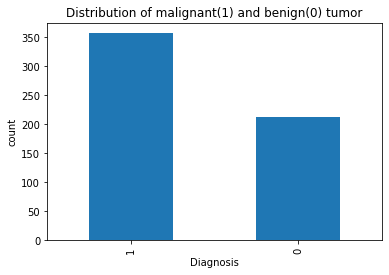

In [7]:
count.plot(kind='bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count");

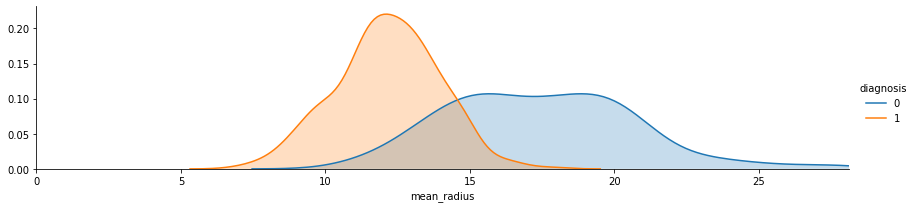

In [8]:
facet = sns.FacetGrid(df, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'mean_radius',shade= True)
facet.set(xlim=(0, df['mean_radius'].max()))
facet.add_legend()
 
plt.show() 

The graph shows that people with mean_radius in range of 12 to 13 have the highest probability of getting breast cancer, while those with mean_radius from 17 to 20 have very low or nearly zero chances of having breast cancer

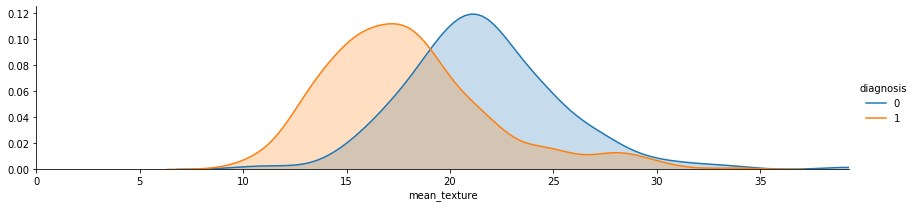

In [9]:
facet = sns.FacetGrid(df, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'mean_texture',shade= True)
facet.set(xlim=(0, df['mean_texture'].max()))
facet.add_legend()
 
plt.show() 

The graph indicates that breast cancer patients are likely to have lower mean_texture compared to healthy people, as a large portion of them having mean_texture in range of 15 to 20. Meanwhile, people with mean_texture of more than 22 are less likely to have breast cancer. 

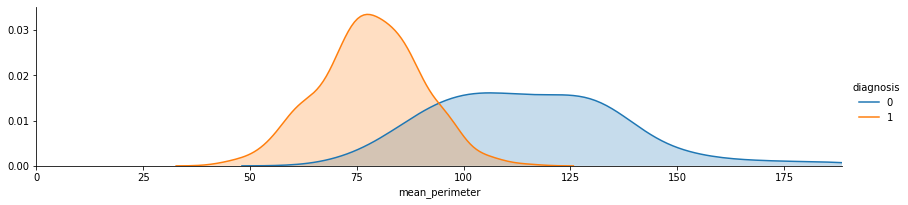

In [10]:
facet = sns.FacetGrid(df, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'mean_perimeter',shade= True)
facet.set(xlim=(0, df['mean_perimeter'].max()))
facet.add_legend()
 
plt.show() 

People with mean_perimeter which is lower than 90 have high chances of having breast cancer, with those whose index in range of 75-80 having the highest probability. Meanwhile, people with mean_perimeter of higher than 100 have slight or nearly no chance of having breast cancer

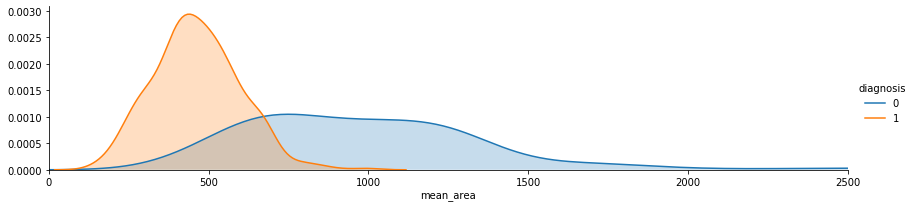

In [11]:
facet = sns.FacetGrid(df, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'mean_area',shade= True)
facet.set(xlim=(0, df['mean_area'].max()))
facet.add_legend()
 
plt.show() 

The graph shows that most of breast cancer patient have mean_area of lowering than 1000, in which those with mean_area of around 500 have the highest probability

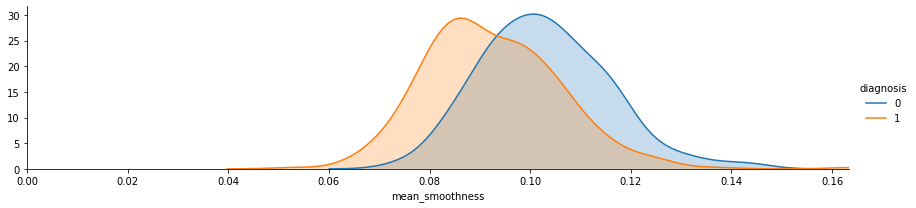

In [12]:
facet = sns.FacetGrid(df, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'mean_smoothness',shade= True)
facet.set(xlim=(0, df['mean_smoothness'].max()))
facet.add_legend()
 
plt.show() 

Most of people participating in the experiment have the mean_smoothness from 0.04 to 0.16, in which those with the index in range of 0.08 to 0.09 have very high chance of getting breast cancer. The probability of getting breast cancer decrease when the mean_smoothness is higher than 0.1

# Correlation among variables

In [13]:
corr = df.corr()
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


All of dependent variables have negative correlation with the diagnosis result. In which, mean_perimeter, mean_radius and mean_texture have the highest correlation with diagnosis. In overall, all variables have high correlation with the result, therefore there is no need to remove any of the them from the dataset.

<b>Visualize the correlation among variables<b>

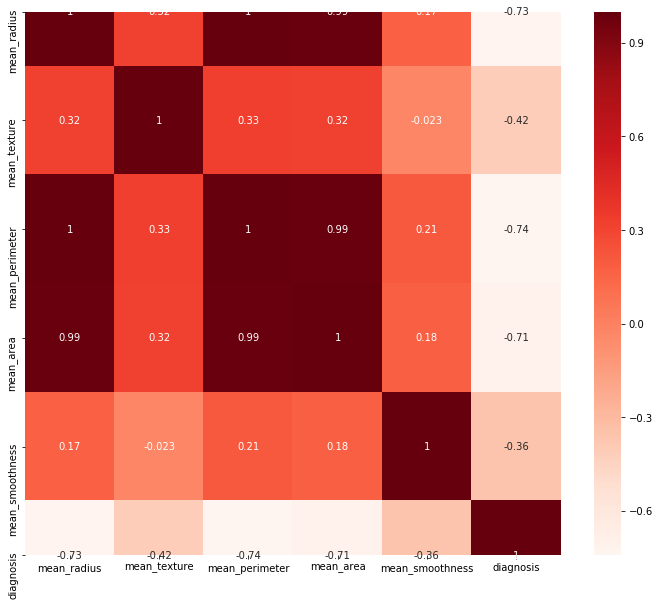

In [14]:
# plt.style.use('classic')
# fig = plt.figure(facecolor = 'white')
# ax = fig.add_subplot(111)
# cax = ax.matshow(corr, vmin = -1, vmax = 1)
# fig.colorbar(cax)
# variable_names = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']
# ticks = np.arange(0, len(variable_names), 1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(variable_names)
# ax.set_yticklabels(variable_names)
# ax.set_xlabel('Correlation')
# plt.setp(ax.get_xticklabels(), rotation = 60)

# for i in range(0, len(variable_names)):
#     for j in range(0, len(variable_names)):
#         text = ax.text(j, i, np.round(corr.iloc[i,j], 2), ha = 'center', va = 'center', color = 'white')

# fig.tight_layout()
# plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

<b>Find the variables which have the most influence on the result</b>

<b>Using Chi-squared statistical test to find the best features</b>

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:5]  #independent columns
y = df.iloc[:,-1]    #target column i.e diagnosis
#apply SelectKBest class to rank best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print features by ranking

             Specs         Score
3        mean_area  53991.655924
2   mean_perimeter   2011.102864
0      mean_radius    266.104917
1     mean_texture     93.897508
4  mean_smoothness      0.149899


From the result, it can be seen that mean_area, mean_perimeter and mean_radius have the highest relationship with the diagnosis result

<b>Using Random Forest to estimate the importance of features</b>

[0.18692146 0.11527333 0.30364422 0.28224317 0.11191782]


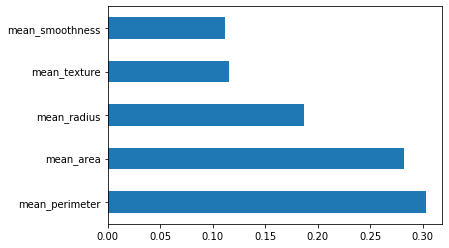

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

Mean_perimeter, mean_area and mean_radius are the most important features in the dataset.
From the correlation and feature selection, mean_perimeter, mean_area and mean_radius have high relationship with the diagnosis result and are the most important features in the dataset. However, mean_smoothness and mean_texture also have influence on the dependent variable, so there is no need to drop any column from the dataset.

In [16]:
x = df.values
print(x[0:5,:])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 0.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 0.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 0.000e+00]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 0.000e+00]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 0.000e+00]]


# K-means

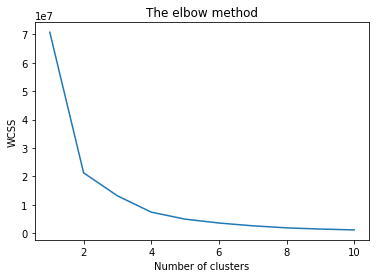

In [17]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Using the elbow method, 2 is the optimum number of clusters

In [18]:
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km2.fit(x)
y_kmeans = km2.fit_predict(x)

<b>Visualize the clustering</b>

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


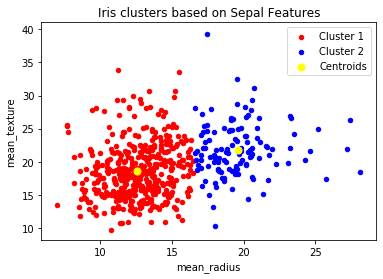

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (df.columns)
plt.title('Iris clusters based on Sepal Features')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])

plt.legend()
plt.show()

# DBSCAN

<b>Using k-distance grapth to find the optimum epsilon for DBSCAN clustering</b>

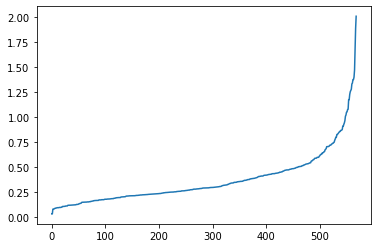

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=6)
nbrs = neigh.fit(x_scaled)
distances, indices = nbrs.kneighbors(x_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Using the elbow method, 0.75 is the optimum epsilon

<b>Visualize the DBSCAN clustering</b>

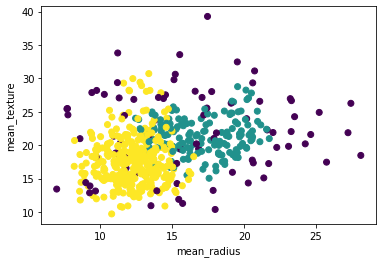

In [21]:
# cluster the data
dbscan = DBSCAN(eps=0.75, min_samples = 7)
clusters = dbscan.fit_predict(x_scaled)

# plot the cluster assignments
plt.scatter(x[:, 0], x[:, 1], c=clusters,)
plt.xlabel("mean_radius")
plt.ylabel("mean_texture")

plt.show()

# Dimension Reduction

In [22]:
from sklearn.preprocessing import StandardScaler
features = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']
# Separating out the features
x_s = df.loc[:, features].values
# Separating out the target
y_s = df.loc[:,['diagnosis']].values
# Standardizing the features
x_s = StandardScaler().fit_transform(X)

pd.DataFrame(data=x_s , columns = features).head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_s)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,1.562077,2.464472
1,2.801064,-0.466274
2,2.848768,0.593637
3,-0.658477,2.624944
4,2.718517,0.897870


In [24]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,diagnosis
0,1.562077,2.464472,0
1,2.801064,-0.466274,0
2,2.848768,0.593637,0
3,-0.658477,2.624944,0
4,2.718517,0.897870,0


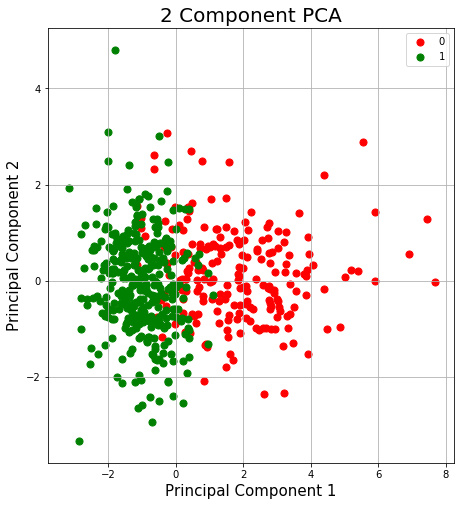

In [25]:
fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(1,2,1) 
ax1.set_xlabel('Principal Component 1', fontsize = 15)
ax1.set_ylabel('Principal Component 2', fontsize = 15)
ax1.set_title('2 Component PCA', fontsize = 20)


targets = [0,1]
colors = 'rg'
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax1.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax1.legend(targets)
ax1.grid()

In [26]:
print(pca.explained_variance_ratio_)

print(pca.explained_variance_ratio_.sum())

[0.63446825 0.2042183 ]
0.8386865510689159


<b>K-means clustering after PCA</b>

In [28]:
x_pca = finalDf.values
print(x[0:5,:])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 0.000e+00]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 0.000e+00]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 0.000e+00]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 0.000e+00]
 [2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 0.000e+00]]


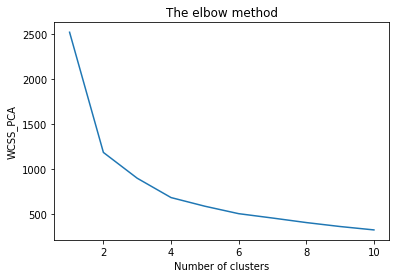

In [29]:
#Finding the optimum number of clusters for k-means classification
wcss_pca = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_pca)
    wcss_pca.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss_pca)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_PCA') #within cluster sum of squares
plt.show()

Using the elbow method, 2 is the optimum number of clusters

In [30]:
km2_pca = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

km2_pca.fit(x_pca)
y_kmeans_pca = km2_pca.fit_predict(x_pca)

Index(['principal component 1', 'principal component 2', 'diagnosis'], dtype='object')


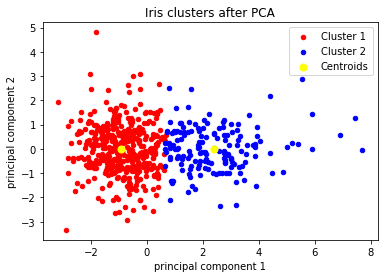

In [31]:
plt.scatter(x_pca[y_kmeans_pca == 0, 0], x_pca[y_kmeans_pca == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(x_pca[y_kmeans_pca == 1, 0], x_pca[y_kmeans_pca == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(km2_pca.cluster_centers_[:, 0], km2_pca.cluster_centers_[:,1], s = 50, c = 'yellow', label = 'Centroids')
print (finalDf.columns)
plt.title('Iris clusters after PCA')
plt.xlabel(finalDf.columns[0])
plt.ylabel(finalDf.columns[1])

plt.legend()
plt.show()

<b>DBSCAN clustering after PCA </b>

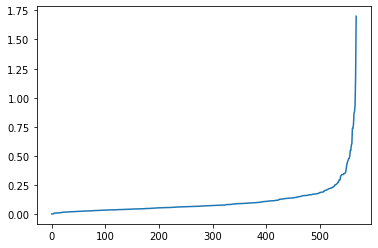

In [32]:
x_pca_scaled = scaler.fit_transform(x_pca)

neigh_pca = NearestNeighbors(n_neighbors=3)
nbrs_pca = neigh_pca.fit(x_pca_scaled)
distances_pca, indices_pca = nbrs_pca.kneighbors(x_pca_scaled)
distances_pca = np.sort(distances_pca, axis=0)
distances_pca = distances_pca[:,1]
plt.plot(distances_pca)

Using elbow method, 0.4 is the optimum epsilon for DBSCAN clustering

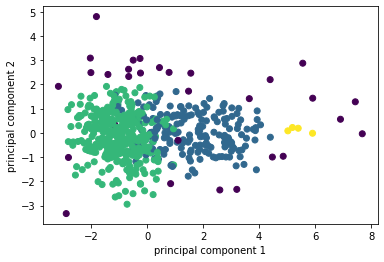

In [33]:
# cluster the data
dbscan_pca = DBSCAN(eps=0.4, min_samples = 4)
clusters_pca = dbscan_pca.fit_predict(x_pca_scaled)

# plot the cluster assignments
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters_pca,)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")

plt.show()